# In this script we clean the data and save the result in a csv file

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Data import and cleaning:
df = pd.read_csv('Data/Dataset4.csv')
df = df.drop(columns=['Flow Pattern', 'L/D', 'Roughness', 'Type of liquid', 'Type of Gas', 'VisG']) #We drop meaningless columns
df = df.fillna({
    'T':25  #This is confirmed in the literature from another article of the same author where the data is missing
})
col_names = df.iloc[:,:-1].columns #Get column names

In [3]:
df.dropna(axis=0, inplace=True)
df['Flow Pattern.1'] = df['Flow Pattern.1'].replace(to_replace=7,value=1)
df.iloc[:,-1] += -1 #Indices starts from 0
#We store the fixed dataframe in df_map:
df_map = df
df.head()

,P,T,DenL,DenG,VisL,ST,ID,Ang,Vsl,Vsg,Flow Pattern.1
0,100.0,20.0,1000.0,1.12,0.001,0.07,0.0254,0.0,0.044817,0.814024,2
1,100.0,20.0,1000.0,1.12,0.001,0.07,0.0254,0.0,0.060976,0.814024,4
2,100.0,20.0,1000.0,1.12,0.001,0.07,0.0254,0.0,0.088110,0.814024,4
3,100.0,20.0,1000.0,1.12,0.001,0.07,0.0254,0.0,0.060976,1.103659,4
4,100.0,20.0,1000.0,1.12,0.001,0.07,0.0254,0.0,0.121951,1.103659,4


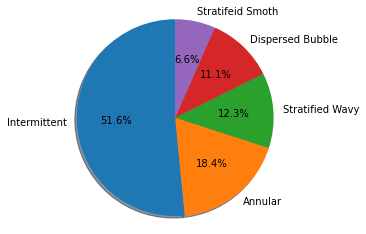

In [4]:
#Check if the dataset is balanced:
df_old = df

sizes = df.iloc[:,-1].value_counts(normalize=True)
sizes.array
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=['Intermittent','Annular','Stratified Wavy','Dispersed Bubble','Stratifeid Smoth'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [5]:
#Please do not use this. It's really inefficient and now I'm too lazy to fix it
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)
j = 0
while True: 
    try:    
        if df.iloc[j,-1] == df.iloc[:,-1].value_counts(normalize=True).index[0]:
            if df.iloc[:,-1].value_counts(normalize=True)[df.iloc[:,-1].value_counts().idxmax()] > 0.27:
                df.drop(df.index[j], inplace=True)
                df.reset_index(drop=True, inplace=True)
            else:
                break
        j +=1
    except:
        j = 0
df.shape

(5715, 11)

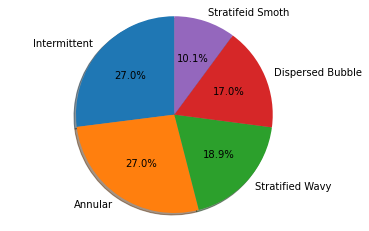

In [6]:
#Again, the same visualiation but after the cleanup

sizes = df.iloc[:,-1].value_counts(normalize=True)
sizes.array
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=['Intermittent','Annular','Stratified Wavy','Dispersed Bubble','Stratifeid Smoth'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
train, test = train_test_split(df, test_size=0.2)
train.reset_index(drop=True, inplace=True)

In [8]:
x = train.iloc[:,:-1].values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
normalizing = pd.DataFrame({'Mean':scaler.mean_, 'Std':scaler.var_**0.5})
train = pd.concat([pd.DataFrame(x_scaled, columns=col_names), train.iloc[:,-1]], axis=1)
train.head()

,P,T,DenL,DenG,VisL,ST,ID,Ang,Vsl,Vsg,Flow Pattern.1
0,-0.194309,-0.032980,-0.826681,0.065006,1.917958,-0.132685,1.175298,-0.115057,-0.558704,-0.611379,1
1,-0.194309,-0.103099,0.428424,-0.295661,-0.548339,-0.130714,-0.823292,0.009276,-0.506628,8.381121,3
2,-0.187193,0.072199,0.428424,-0.286088,-0.548339,-0.130714,-0.838998,0.382275,0.112605,-0.586413,4
3,-0.194309,-0.032980,-0.826681,0.065006,1.917958,-0.132685,0.189746,-0.214523,0.809237,-0.577565,0
4,-0.182664,0.072199,0.428424,-0.286088,-0.548339,-0.130714,-0.838998,1.252606,0.160095,0.808848,4


In [9]:
normalizing.head()

,Mean,Std
0,160.069707,309.145059
1,22.940687,28.522832
2,952.211701,111.544430
3,3.590760,8.356744
4,0.002334,0.002433


In [10]:
train.to_csv('Data/Train.csv',index = False)
test.to_csv('Data/Test.csv',index = False)

In [11]:
normalizing.to_csv('Data/Normalizing.csv', index=False)
df_map.to_csv('Data/Map.csv', index=False)

In [12]:
df_dropped = pd.concat([df_old, df]).drop_duplicates(keep=False)
df_dropped.to_csv('Data/Dropped.csv', index=False)